In [4]:
import numpy as np
import pandas as pd

data_players=pd.read_csv('datasets/dota-2-matches/players.csv')
data_players.head()
data_matches=pd.read_csv('datasets/dota-2-matches/match.csv')
data_matches

,match_id,start_time,duration,tower_status_radiant,tower_status_dire,barracks_status_dire,barracks_status_radiant,first_blood_time,game_mode,radiant_win,negative_votes,positive_votes,cluster
0,0,1446750112,2375,1982,4,3,63,1,22,True,0,1,155
1,1,1446753078,2582,0,1846,63,0,221,22,False,0,2,154
2,2,1446764586,2716,256,1972,63,48,190,22,False,0,0,132
3,3,1446765723,3085,4,1924,51,3,40,22,False,0,0,191
4,4,1446796385,1887,2047,0,0,63,58,22,True,0,0,156
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49995,1447829192,3025,1824,0,0,63,117,22,True,0,0,111
49996,49996,1447829181,1451,1982,384,48,63,147,22,True,0,0,204
49997,49997,1447829197,2672,1830,0,0,63,130,22,True,0,0,111
49998,49998,1447829189,2211,1982,4,3,63,645,22,True,0,0,151


In [5]:
dire_data = data_players.groupby('match_id')['hero_id'].apply(list)

def get_heros(df):
    teams_data = []
    for j in range(df.shape[0]):
        new_r=list()
        for i in range(5):
            new_r.append(df[j].pop(df[j].index(df[j][0])))
        teams_data.append(new_r)
    return pd.DataFrame(np.array(teams_data).reshape(50000, 5), columns=["rad_hero_1", "rad_hero_2", "rad_hero_3", "rad_hero_4", "rad_hero_5"])

radiant_data = get_heros(dire_data)

In [6]:
dire_data_pd = pd.DataFrame(columns=["dir_hero_1", "dir_hero_2", "dir_hero_3", "dir_hero_4", "dir_hero_5"])

for i in range(dire_data.shape[0]):
    dire_data_pd = pd.concat([dire_data_pd, pd.DataFrame(np.array(dire_data[i]).reshape(1,5), columns=["dir_hero_1", "dir_hero_2", "dir_hero_3", "dir_hero_4", "dir_hero_5"])], ignore_index=True)

dire_data_pd

,dir_hero_1,dir_hero_2,dir_hero_3,dir_hero_4,dir_hero_5
0,106,102,46,7,73
1,73,22,5,67,106
2,38,7,10,12,85
3,78,19,31,40,47
4,101,100,22,67,21
...,...,...,...,...,...
49995,32,7,109,35,112
49996,36,1,112,60,71
49997,28,102,21,9,23
49998,46,7,29,44,3


In [7]:
data_matches = pd.concat([data_matches, radiant_data, dire_data_pd], axis=1)
data_matches = data_matches.drop(columns=['start_time','duration','game_mode','positive_votes','negative_votes','cluster'])
data_matches

,match_id,tower_status_radiant,tower_status_dire,barracks_status_dire,barracks_status_radiant,first_blood_time,radiant_win,rad_hero_1,rad_hero_2,rad_hero_3,rad_hero_4,rad_hero_5,dir_hero_1,dir_hero_2,dir_hero_3,dir_hero_4,dir_hero_5
0,0,1982,4,3,63,1,True,86,51,83,11,67,106,102,46,7,73
1,1,0,1846,63,0,221,False,7,82,71,39,21,73,22,5,67,106
2,2,256,1972,63,48,190,False,51,109,9,41,27,38,7,10,12,85
3,3,4,1924,51,3,40,False,50,44,32,26,39,78,19,31,40,47
4,4,2047,0,0,63,58,True,8,39,55,87,69,101,100,22,67,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49995,1824,0,0,63,117,True,73,86,21,20,14,32,7,109,35,112
49996,49996,1982,384,48,63,147,True,93,74,100,32,85,36,1,112,60,71
49997,49997,1830,0,0,63,130,True,100,68,75,39,44,28,102,21,9,23
49998,49998,1982,4,3,63,645,True,56,50,2,72,30,46,7,29,44,3


In [12]:
def divide_by_team(df):
    new_df = pd.DataFrame()
    for j in range(df.shape[0]):
        new_r=list()
        for i in range(5):
            new_r.append(df[j].pop(df[j].index(df[j][0])))
        new_df = pd.concat([new_df, pd.DataFrame([[new_r]]).T], ignore_index=True)
    return new_df

def adding_mean_values_of_diff_features_by_team(df, groupby, features, new_df):    
    for i in range(len(features)):
        dire_data = df.groupby(groupby)[features[i]].apply(list)
        radiant_data = divide_by_team(dire_data)
        radiant_data = radiant_data[0].apply(lambda x : sum(x)/len(x))
        dire_data = dire_data.apply(lambda x :sum(x)/len(x))
        new_df[features[i] + '_radiant'] = radiant_data
        new_df[features[i] + '_dire'] = dire_data
    return new_df

In [13]:
features = ['gold_spent','gold_per_min','xp_per_min','kills','deaths','tower_damage','hero_damage']
data_matches = adding_mean_values_of_diff_features_by_team(data_players, 'match_id', features, data_matches)
data_matches.head()

,match_id,tower_status_radiant,tower_status_dire,barracks_status_dire,barracks_status_radiant,first_blood_time,radiant_win,rad_hero_1,rad_hero_2,rad_hero_3,...,xp_per_min_radiant,xp_per_min_dire,kills_radiant,kills_dire,deaths_radiant,deaths_dire,tower_damage_radiant,tower_damage_dire,hero_damage_radiant,hero_damage_dire
0,0,1982,4,3,63,1,True,86,51,83,...,554.6,417.8,10.0,3.0,3.4,10.4,1770.6,510.0,17045.2,9431.0
1,1,0,1846,63,0,221,False,7,82,71,...,458.8,623.4,7.0,10.0,10.6,7.4,484.0,2229.6,11716.8,18663.2
2,2,256,1972,63,48,190,False,51,109,9,...,321.2,476.0,4.4,9.6,9.8,4.4,377.2,1598.0,9208.6,12251.6
3,3,4,1924,51,3,40,False,50,44,32,...,520.6,526.2,12.8,12.6,13.2,13.0,920.8,1861.8,17303.0,21476.4
4,4,2047,0,0,63,58,True,8,39,55,...,519.8,313.2,7.4,3.2,3.2,7.4,2612.4,9.0,11552.0,10012.8


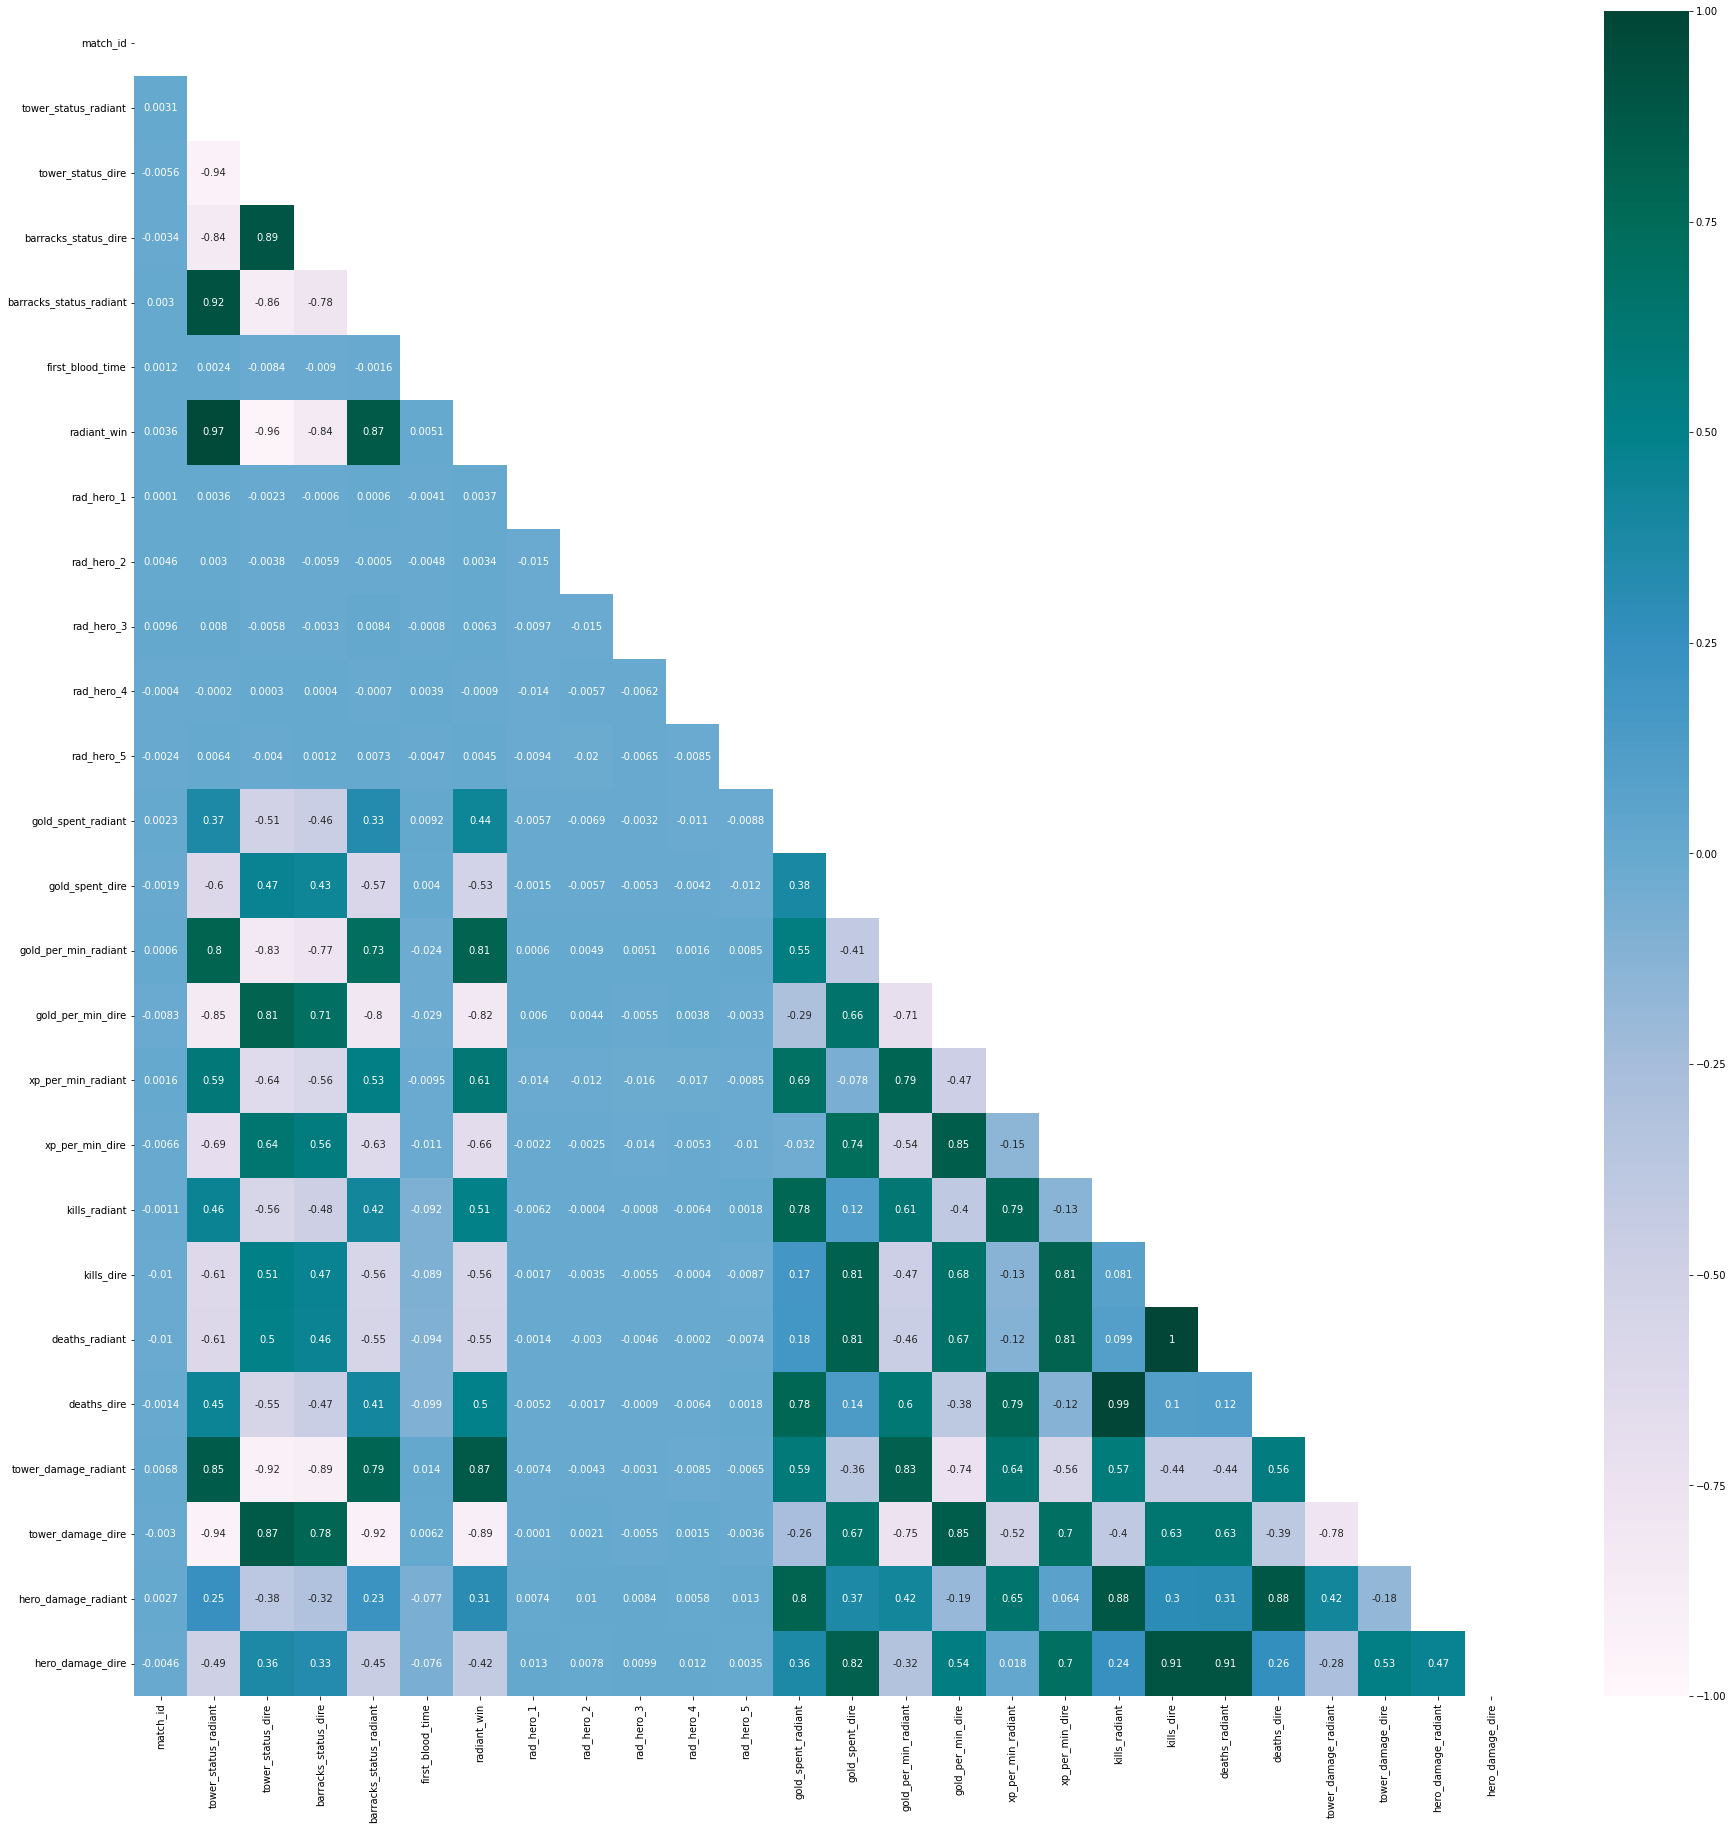

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

correl = data_matches.corr().round(4)
mask = np.zeros_like(correl)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=((len(data_matches.columns)), (len(data_matches.columns))))
sns.heatmap(correl, annot=True, ax=ax, cmap="PuBuGn", vmin=-1, vmax=1, mask=mask);

In [28]:
from matplotlib.gridspec import GridSpec

def visual_eda(df, target, col):
    # Create copy variables of df and col
    data = df[col].copy()
    name = col
    median = data.median()        
    # Create gridspec for plots
    fig = plt.figure(figsize=(15, 6))
    gs = GridSpec(nrows=1, ncols=2)

    ax0 = fig.add_subplot(gs[0])
    ax1 = fig.add_subplot(gs[1])

    # Plot distribution 
    sns.histplot(data,alpha=0.5,stat='density',ax=ax0)
    ax0.set(ylabel='Density', title=name)
    ax0.set_title(f"Distribution: {name}")
    ax0.axvline(median,label=f'median={median:,}',color='black')
    ax0.legend()
    sns.regplot(data=df, x=col, y=target, line_kws={"color": "red"}, ax=ax1)
    ax1.set_title(f"Scatter Plot: {name}")
    return fig, gs

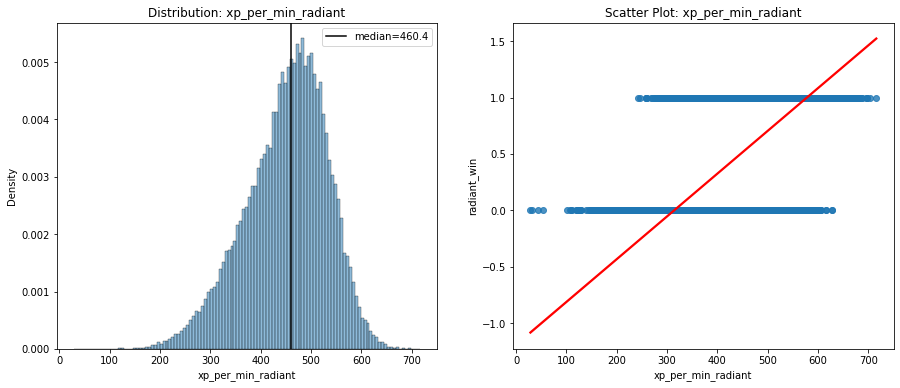

In [29]:
visual_eda(data_matches, 'radiant_win', 'xp_per_min_radiant');

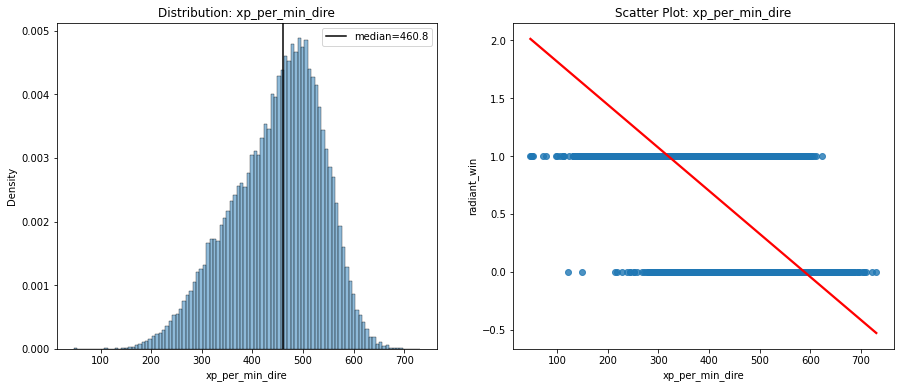

In [30]:
visual_eda(data_matches, 'radiant_win', 'xp_per_min_dire');

In [91]:
def evaluate_model(model, X_train, y_train, X_test, y_test, digits=4, 
                   figsize=(10,5), params=False): 
    """
    Displays evaluation metrics including classification report, confusion
    matrix, ROC-AUC curve.
    
    If the argument 'params' is passed, will display a table of the 
    parameters hyperparameters used in the model.

    Args:
        df (DataFrame) : DataFrame with features to check multicollinearity on.
        model (classifier object) : Type of classificatier model to use.
        X_train (DataFrame) : Training data with feature variables.
        y_train (Series) : Training data with target variable.
        X_test (DataFrame) : Testing data with feature variables.
        y_test (Series) : Testing data with target variable.
        digits (int) : Colormap to display correlation range. Default is 4.
        figsize (int, int) : Figure dimensions. Default is (10,5)
        params (bool) : Prints table of hyperparameters used in model.
        
    Returns:
    """
    # Get Predictions
    y_hat_test = model.predict(X_test)
    y_hat_train = model.predict(X_train)
    
    # Classification Report / Scores 

    print("****CLASSIFICATION REPORT - TRAINING DATA****")
    
    print(metrics.classification_report(y_train,y_hat_train, digits=digits))
    

    print("****CLASSIFICATION REPORT - TEST DATA****")
    
    print(metrics.classification_report(y_test,y_hat_test, digits=digits))

    print("****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****")

    
    fig, axes = plt.subplots(ncols=2, 
                             figsize=figsize)
    
    # Confusion Matrix
    metrics.plot_confusion_matrix(model, X_test,
                                  y_test,normalize='true',
                                 cmap='Purples',ax=axes[0])
    axes[0].set_title('Confusion Matrix')
    
    # Plot ROC Curve
    metrics.plot_roc_curve(model,X_test,y_test,ax=axes[1])

    ax = axes[1]
    ax.legend()
    ax.plot([0,1],[0,1], ls='-')
    ax.grid()
    ax.set_title('ROC AUC Curve')
    
    plt.tight_layout()
    plt.show()
    
    if params == True:
        print("****MODEL PARAMETERS****")
        params = pd.DataFrame(pd.Series(model.get_params()))
        params.columns=['parameters']
        display(params)
    return y_hat_test

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

y = data_matches['radiant_win']
X = data_matches.drop('radiant_win', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6220)
cols = X_train.columns
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=cols)
X_test = pd.DataFrame(scaler.transform(X_test), columns=cols)

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     18043
        True       1.00      1.00      1.00     19457

    accuracy                           1.00     37500
   macro avg       1.00      1.00      1.00     37500
weighted avg       1.00      1.00      1.00     37500

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      6014
        True       1.00      1.00      1.00      6486

    accuracy                           1.00     12500
   macro avg       1.00      1.00      1.00     12500
weighted avg       1.00      1.00      1.00     12500

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


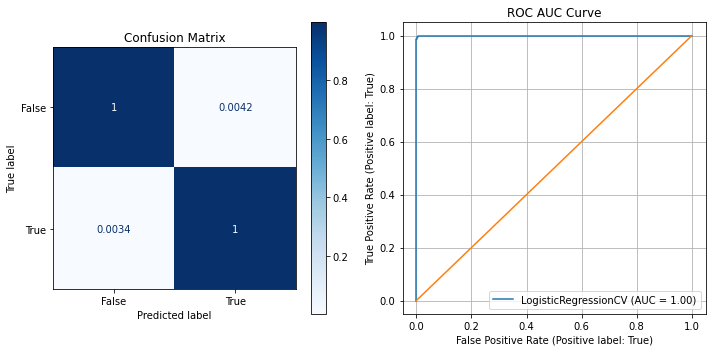

In [39]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

def print_report(model, X_test, y_train, y_test, name=""):
    y_hat_test = lr_model.predict(X_test)
    y_hat_train = lr_model.predict(X_train)
    
    print(f"Classification Report - Train - {name}")
    print(metrics.classification_report(y_train, y_hat_train))
    print(f"Classification Report - Test - {name}")
    print(metrics.classification_report(y_test,y_hat_test))
    print(f"")

    fig, axes = plt.subplots(ncols=2, figsize=(10,5))
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, normalize='true', cmap='Blues', ax=axes[0])
    axes[0].set_title('Confusion Matrix')

    RocCurveDisplay.from_estimator(model, X_test, y_test, ax=axes[1])

    ax = axes[1]
    ax.legend()
    ax.plot([0,1],[0,1], ls='-')
    ax.grid()
    ax.set_title('ROC AUC Curve')

    plt.tight_layout()
    plt.show()

lr_model = LogisticRegressionCV()
lr_model.fit(X_train, y_train)

svc_model = SVC()
svc_model.fit(X_train, y_train)

print_report(lr_model, X_test, y_train, y_test, "LogisticRegressionCV")
print_report(svc_model, X_test, y_train, y_test, "SVC")

In [96]:
print(pred)
true_test_data=pd.read_csv('/kaggle/input/dota-2-matches/test_labels.csv')
true_test_data.sort_values(by=['match_id'])
print(true_test_data.head())
data_matches.shape

[ True False  True ... False False  True]


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/dota-2-matches/test_labels.csv'